## Tensorflow 1 introduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
tf.__version__

'1.14.0'

## Data generation

In [4]:
observations = 1000

xs = np.random.uniform(low=-1,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

## Solving with tensorflow 

In [5]:
input_size = 2
output_size = 1

### Outlining the model

Placeholder is where we feed the data. The NONE means we need not specify the dimension;
Variables preserve their values across iterations, while placeholders don't 

In [7]:
inputs = tf.placeholder(tf.float32,[None,input_size])
targets = tf.placeholder(tf.float32,[None,output_size])

weights = tf.Variable(tf.random_uniform([input_size,output_size],minval=-0.1,maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size],minval=-0.1,maxval=0.1))

outputs = tf.matmul(inputs,weights) + biases

### Choosing the objective function and the optimization method

In [9]:
mean_loss = tf.losses.mean_squared_error(labels=targets,predictions=outputs)/2.

optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)

### Prepare for execution

In tensorflow the training happens in sessions , When we use tf.IneractiveSession() we actually say "Its time to execute "

In [10]:
sess = tf.InteractiveSession()

### Initializing the variables

In [12]:
initializer = tf.global_variables_initializer()

sess.run(initializer)

### Loading the data

In [13]:
training_data = np.load('TF_intro.npz')

### Learnining

Feed_dict tells the algorithm how the data is going to be fed

In [14]:
for e in range(100):
    
    _,curr_loss = sess.run([optimize,mean_loss],
                          feed_dict = {inputs:training_data['inputs'],targets:training_data['targets']})
    print(curr_loss)

249.10861
69.72275
23.518368
10.135817
5.7440257
4.122632
3.4499726
3.1290116
2.9458773
2.8192701
2.7171686
2.6266828
2.5425448
2.4625545
2.3857675
2.3117461
2.2402642
2.1711822
2.1043985
2.0398273
1.9773927
1.9170221
1.8586468
1.8022006
1.7476196
1.6948415
1.6438079
1.5944607
1.5467434
1.5006028
1.4559875
1.412846
1.37113
1.3307917
1.291787
1.254071
1.2176011
1.1823367
1.1482365
1.1152643
1.0833805
1.0525508
1.0227396
0.9939136
0.9660396
0.9390868
0.9130249
0.8878239
0.86345524
0.8398922
0.81710815
0.7950763
0.7737726
0.7531729
0.73325396
0.7139929
0.6953683
0.6773592
0.6599452
0.64310634
0.62682396
0.6110798
0.59585595
0.5811349
0.5669003
0.5531358
0.5398265
0.52695656
0.5145121
0.5024789
0.49084315
0.4795918
0.46871245
0.45819244
0.44801995
0.43818396
0.42867267
0.4194756
0.41058263
0.40198347
0.3936683
0.38562787
0.37785327
0.37033564
0.36306602
0.35603702
0.34923995
0.3426676
0.3363125
0.33016723
0.3242251
0.31847945
0.31292337
0.30755115
0.30235633
0.29733306
0.29247585
0.2877791

### Plotting the data

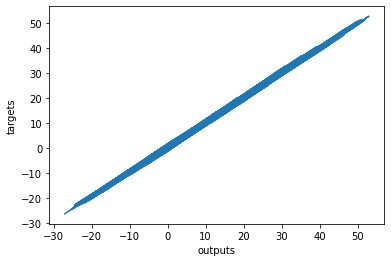

In [15]:
out = sess.run([outputs],
              feed_dict = {inputs: training_data['inputs']})
plt.plot(np.squeeze(out),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()